Why and When Employee Quit

In [37]:
# dependencies
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier



In [38]:
#read in csv file into a pandas dataframe
attrition_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

attrition_df.head() #print first 10 rows of dataframe


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [39]:
#print columns
print(attrition_df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


<AxesSubplot:xlabel='Attrition', ylabel='count'>

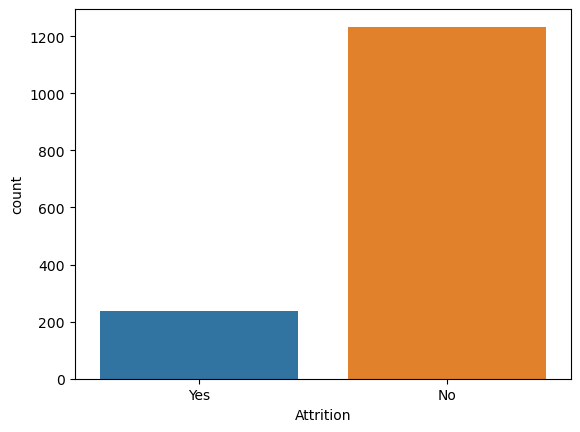

In [73]:
sns.countplot(x='Attrition',data=attrition_df)


In [40]:
#how many columns and rows are there in the dataset
print("Number of rows:",attrition_df.shape[0])
print("Number of columns:",attrition_df.shape[1])


Number of rows: 1470
Number of columns: 35


In [53]:
#drop na values
attrition_df = attrition_df.dropna()
#check if there are any null values
attrition_df.isnull().values.any()

False

In [54]:
#drop DailyRate, EmployeeCount, EmployeeNumber, HourlyRate, MonthlyRate, Over18, StandardHours, JobInvolvement
attrition_cleaned_df = attrition_df.drop(['DailyRate', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate', 'Over18', 'StandardHours', 'JobInvolvement','Education', 'EducationField', 'EnvironmentSatisfaction', 'JobRole', 'MaritalStatus','OverTime','StandardHours', 'StockOptionLevel','TotalWorkingYears'], axis=1)

attrition_cleaned_df.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,Female,2,4,5993,8,11,3,1,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,Male,2,2,5130,1,23,4,4,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,Male,1,3,2090,6,15,3,2,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,Female,1,3,2909,1,11,3,3,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,Male,1,2,3468,9,12,3,4,3,3,2,2,2,2


In [58]:
#Export Attrition data to csv
attrition_cleaned_df.to_csv('attrition_cleaned.csv', index=False)

Analysis of the Following Columns

-Department
-Gender
-Monthly Income
-PercentSalaryHike
-Yearsatcompany
-Yearssincelastpromotion
-Distancefromhome
-Yearswithcurrentmanager
-Performancerating


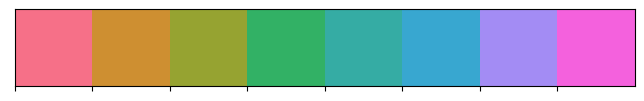

In [74]:
sns.palplot(sns.color_palette("husl", 8))
plt.show()

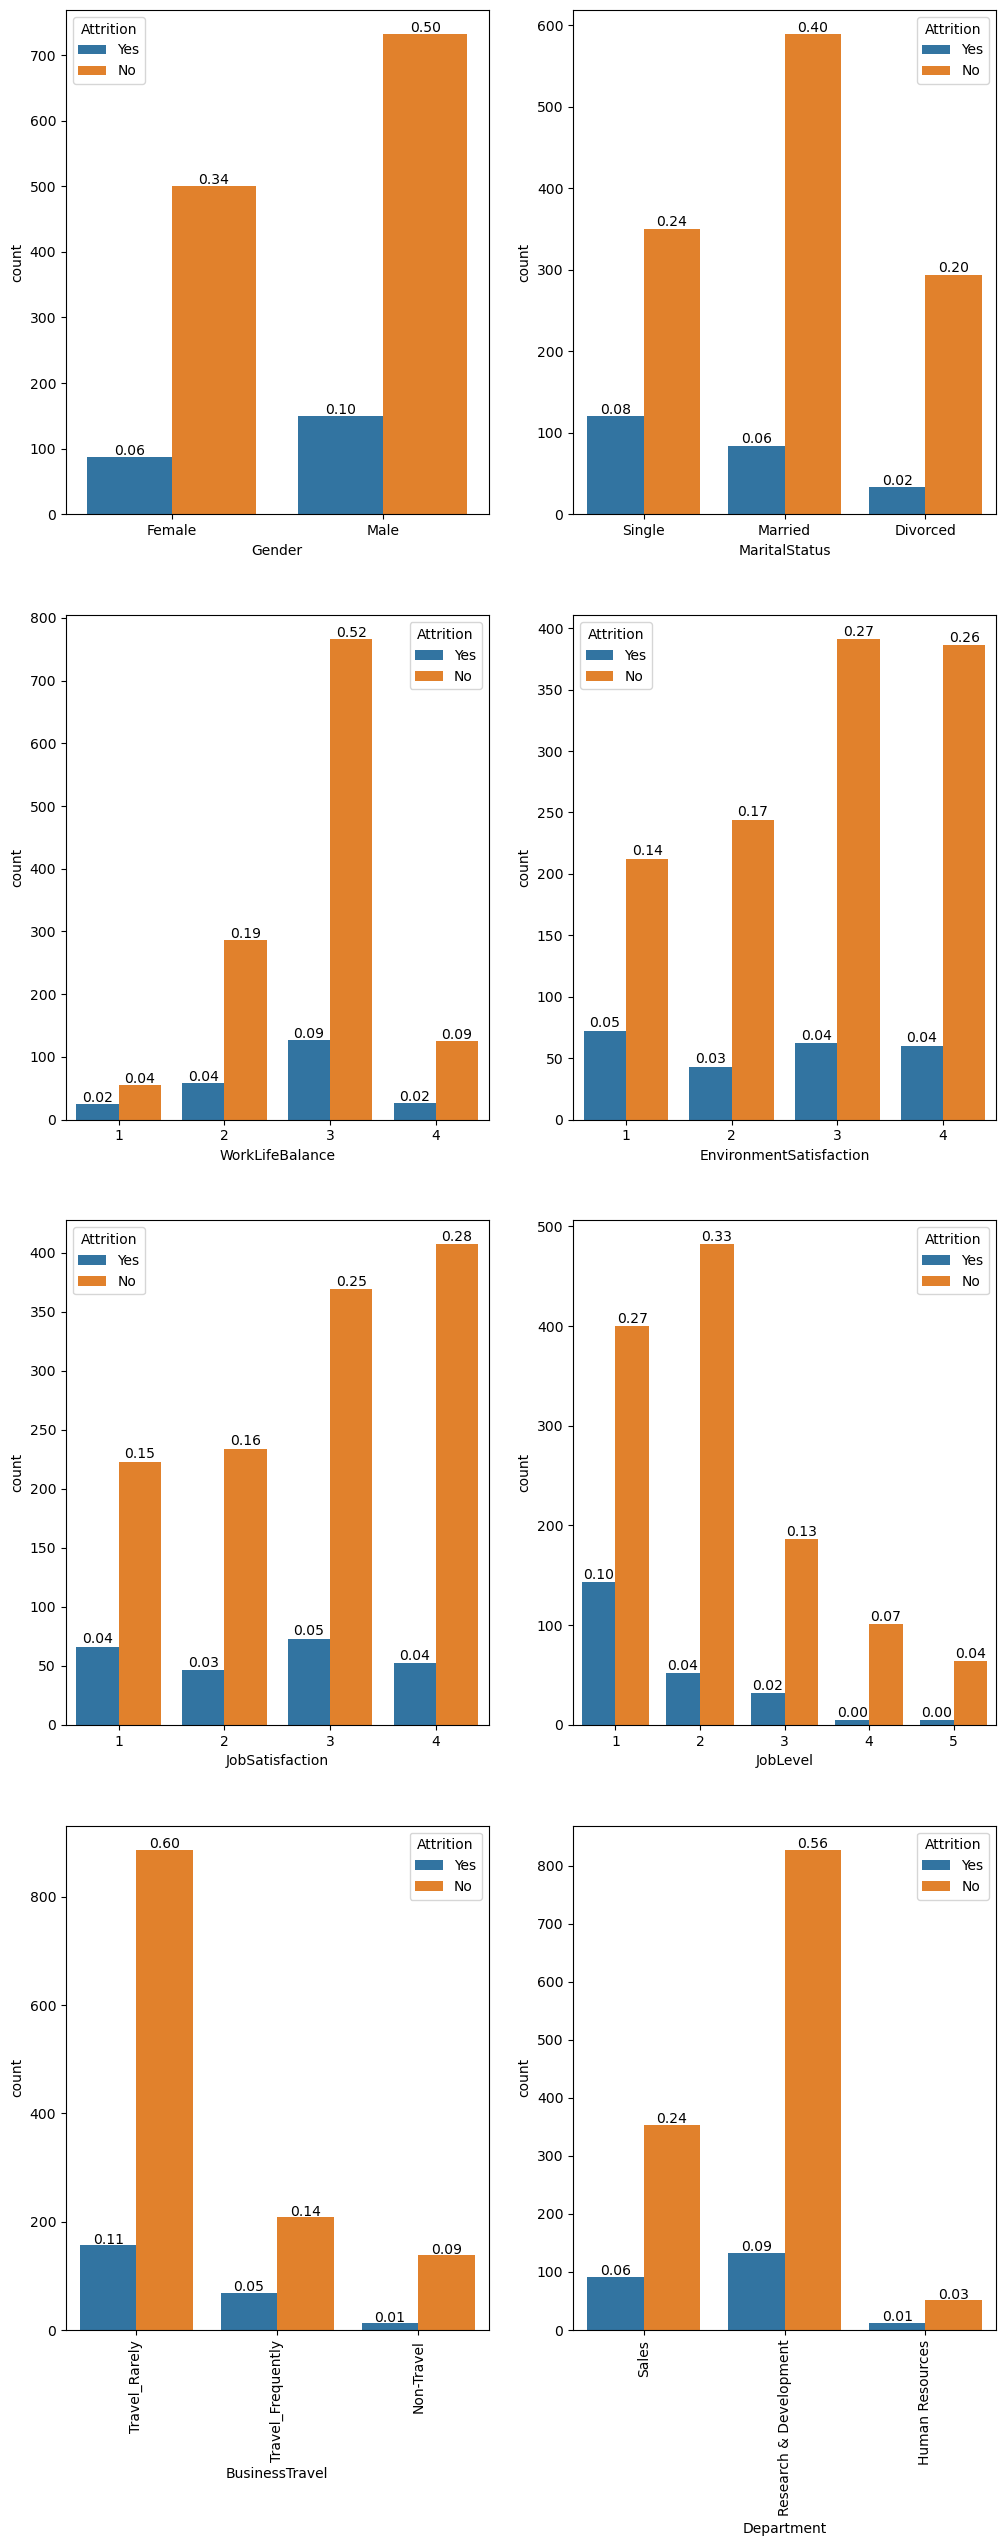

In [91]:
total_records= len(attrition_df)
columns = ["Gender","MaritalStatus","WorkLifeBalance","EnvironmentSatisfaction","JobSatisfaction",
           "JobLevel","BusinessTravel","Department"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    ax1 = sns.countplot(data=attrition_df,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()



Observation of above Count Plot Graph
High attrition rate in given attribute

Single attrition rate is 50% in marital status.
Job Level -1 attrition rate is also high comapre to other job levels
EnvironmentSatisfaction Level 1 has high attrition rate.
Attrition raltes are high in these attribute Sales Deparment, Male,Jobsatisfaction 1


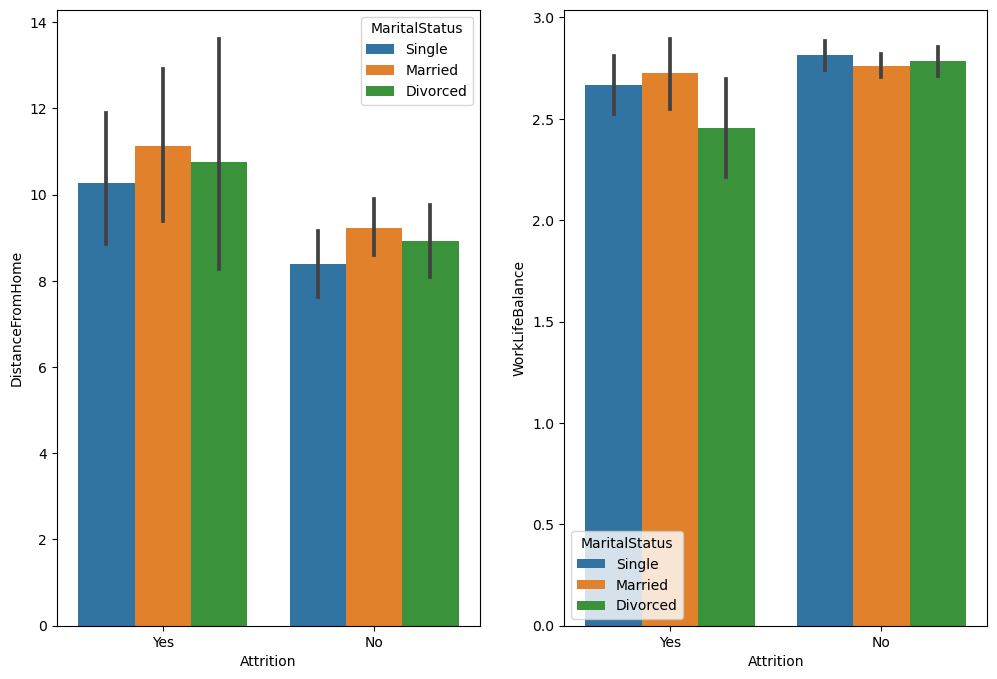

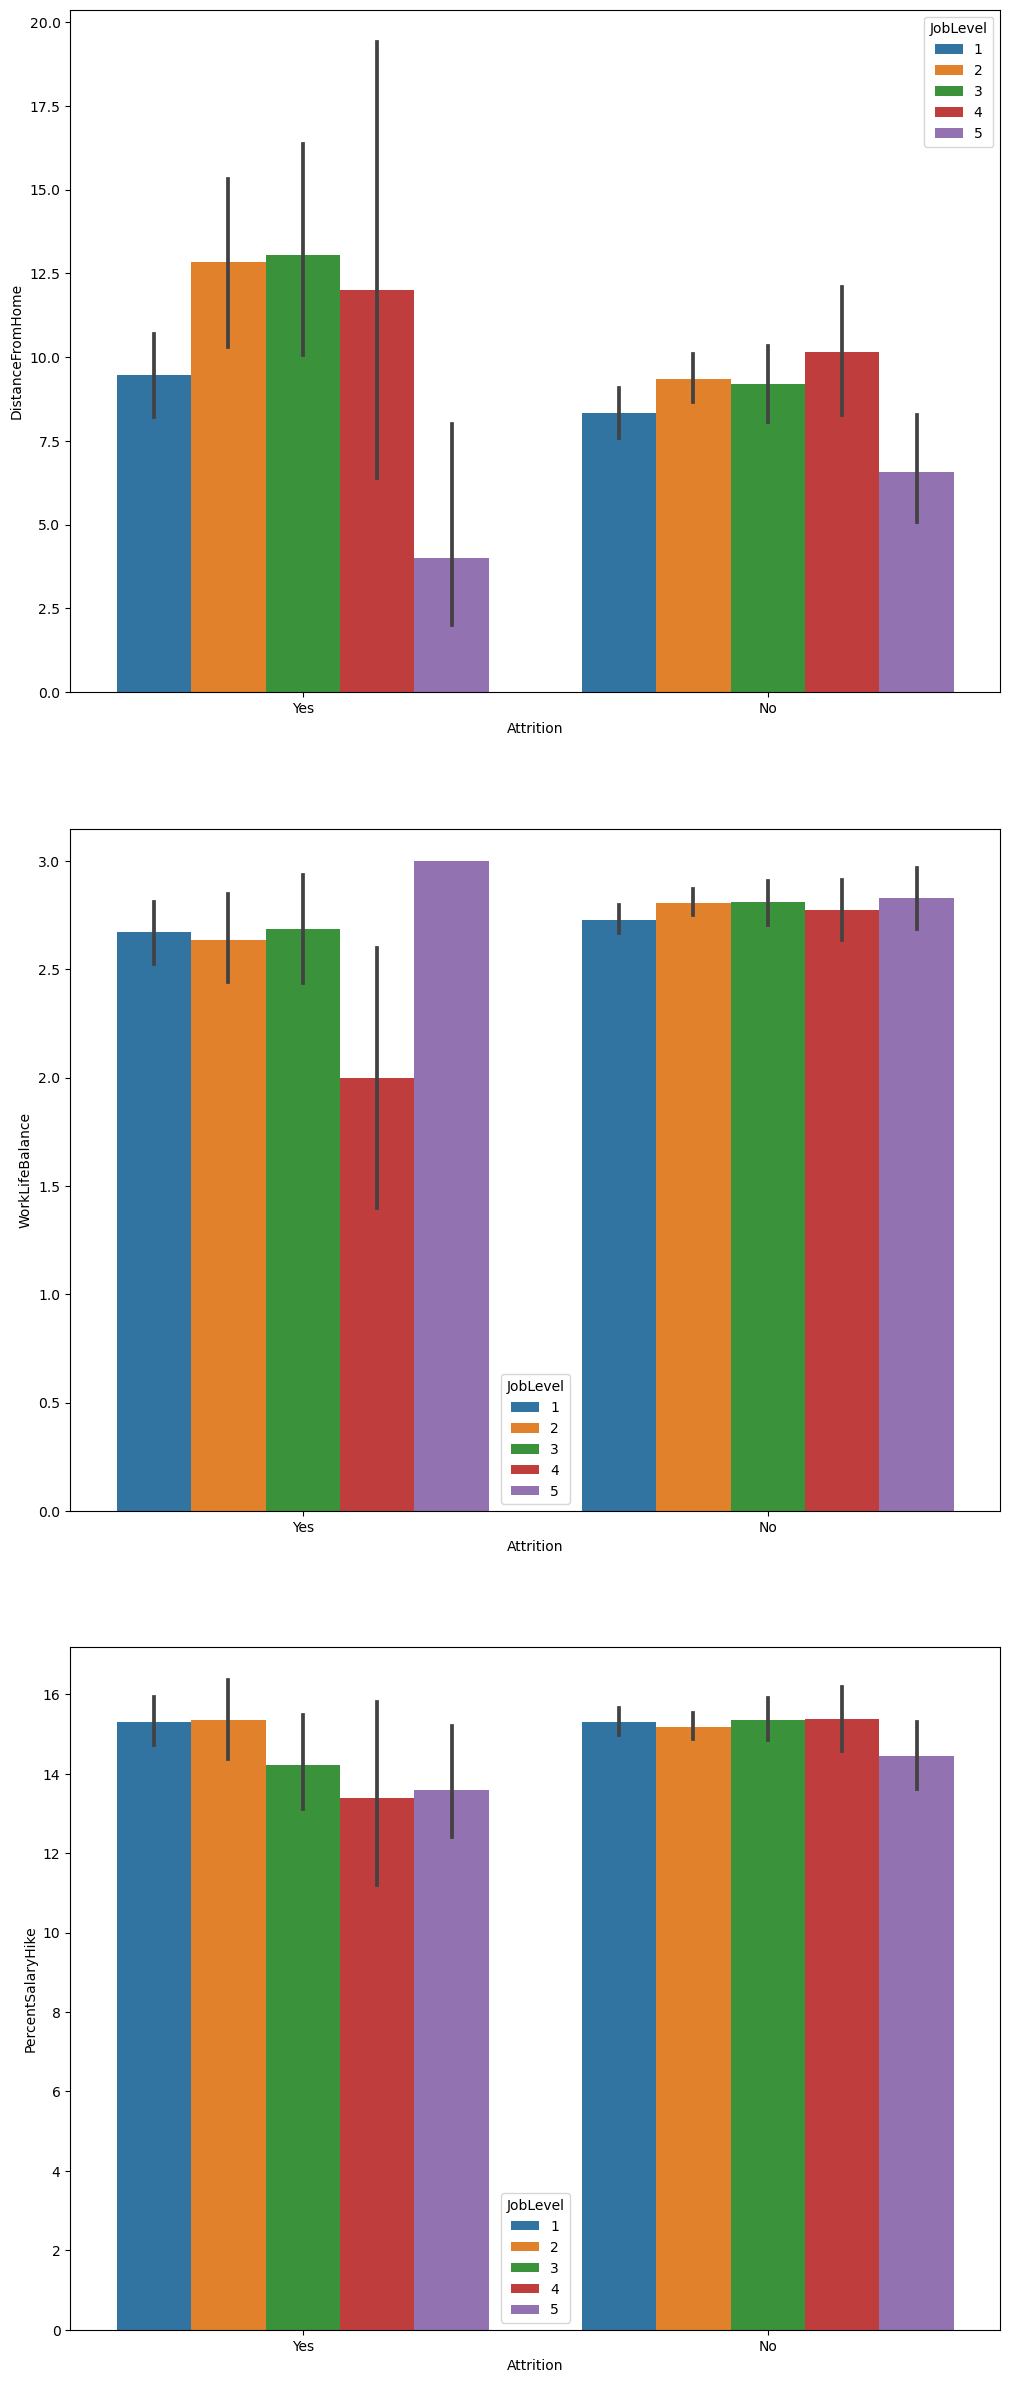

In [90]:
# MaritalStatus 
columns = ["DistanceFromHome",
"WorkLifeBalance"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(1,2,j)
    sns.barplot(x = 'Attrition', y = attrition_df[i], hue="MaritalStatus", data =attrition_df)


plt.show()

#JobLevel
columns = ["DistanceFromHome",
"WorkLifeBalance",
"PercentSalaryHike"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(3,1,j)
    sns.barplot(x = 'Attrition', y = attrition_df[i], hue="JobLevel", data =attrition_df)

plt.subplots_adjust(bottom=-0.9, top=2)

plt.show()

Employee are more likely to quit , When

DistanceFromHome is above 8KM and (Married people are higher in this case )
DistanceFromHome is above 2.5 for JobLevel 5